## IFPB - Campus Campina Grande
## Profº: Paulo Ribeiro Lins
## Alunos: Lílian Teixeira, Elismar Silva, Bruna Cavalcanti.
## Disciplina: Estatística aplicada a Computação
## Data: 12/12/2019
### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# <center> RESUMO      </center>

<h4> Iremos trabalhar com os arquivos do ano de 2010 até 2019, a partir do site a seguir:
 https://dadosabertos.camara.leg.br/swagger/api.html#staticfile. </h4>
    
Com o nome Projeto - Serenata de Amor, que visa o exibir para a população os gastos feitos pelos deputados de todo o Brasil, em relação desde dispesas simples como manutenção de escritório até mesmo como gastos milionário como passagens aéreas.
    
#### Obs: Para acessar os dados foi necessário fazer o download dos mesmos pois eles se encontravam em formato .zip, no lugar de .csv

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# <CENTER>FORMATAÇÃO DOS DADOS

<h5> Necessário a importação das bibliotecas utilizadas

In [521]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h5> Importação dos dados em csv para cada atribuição


In [522]:
dados2010 = pd.read_csv('Ano-2010.csv', sep=';')    #Ano 0
dados2011 = pd.read_csv('Ano-2011.csv', sep=';')    #Ano 1
dados2012 = pd.read_csv('Ano-2012.csv', sep=';')    #Ano 2
dados2013 = pd.read_csv('Ano-2013.csv', sep=';')    #Ano 3
dados2014 = pd.read_csv('Ano-2014.csv', sep=';')    #Ano 4
dados2015 = pd.read_csv('Ano-2015.csv', sep=';')    #Ano 5
dados2016 = pd.read_csv('Ano-2016.csv', sep=';')    #Ano 7
dados2017 = pd.read_csv('Ano-2017.csv', sep=';')    #Ano 8
dados2018 = pd.read_csv('Ano-2018.csv', sep=';')    #Ano 9
dados2019 = pd.read_csv('Ano-2019.csv', sep=';')    #Ano 10

<h5> E por fim da iniciação a criação de uma leitura dos dados e a das colunas que serão utilizadas ao longo do projeto, além da peneração das colunas para a redução das quais apenas nos usaríamos. 

In [523]:
anos = [dados2010, dados2011, dados2012, dados2013, dados2014, dados2015, dados2016, dados2017, dados2018, dados2019]

for ano in range(len(anos)):
    anos[ano] = anos[ano].iloc[:,[0,5,6,8,9,10,12,17,20,24]].dropna()

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# <H2><CENTER> QUESTIONÁRIOS E RESPOSTAS

# <H3> 1. Verificação em relação aos anos que possuem eleições com número de gastos mais alarmantes.

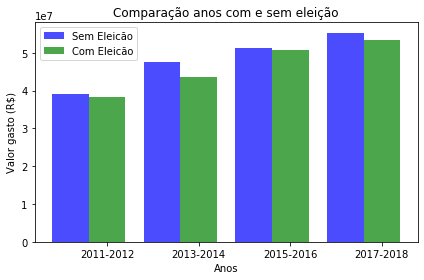

In [524]:
def plota_bar_dupla(ano2011, ano2012, ano2013, ano2014, ano2015, ano2016, ano2017, ano2018):
    grupos = 4
    semEleicao = (ano2011.sum(), ano2013.sum(), ano2015.sum(), ano2017.sum())
    comEleicao = (ano2012.sum(), ano2014.sum(), ano2016.sum(), ano2018.sum())
    fig, ax = plt.subplots()
    indice = np.arange(grupos)
    bar_larg = 0.4
    transp = 0.7
    plt.bar(indice, semEleicao, bar_larg, alpha=transp, color='blue', label='Sem Eleicão')
    plt.bar(indice + bar_larg, comEleicao, bar_larg, alpha=transp, color='green', label='Com Eleicão')

    plt.xlabel('Anos') 
    plt.ylabel('Valor gasto (R$)') 
    plt.title('Comparação anos com e sem eleição') 
    plt.xticks(indice + bar_larg, ('2011-2012', '2013-2014', '2015-2016', '2017-2018'))
    plt.legend() 
    plt.tight_layout() 
    plt.show()

    
plota_bar_dupla(anos[1]['vlrDocumento'], anos[2]['vlrDocumento'], anos[3]['vlrDocumento'], anos[4]['vlrDocumento'], 
                anos[5]['vlrDocumento'], anos[6]['vlrDocumento'], anos[7]['vlrDocumento'],anos[8]['vlrDocumento'])

#### O gráfico utilizado foi o de barra dupla para comparação de pares em relações aos anos.

# <H3> 2. Quais foram os estabelecimentos mais visitados e quantas vezes foram visitados?


In [525]:
cont = 0
estabelecimentos = {
    'Ano':[],
    'Estabelecimento':[],
    'Visitas':[]
}

for ano in anos:
    estabelecimentos['Ano'].append('201'+str(cont))
    dado = ano['txtFornecedor'].value_counts()[[0]]
    estabelecimentos['Estabelecimento'].append(dado.index[0])
    estabelecimentos['Visitas'].append(dado[0])
    cont += 1
Estabelecimentos = pd.DataFrame(estabelecimentos).set_index('Ano')
Estabelecimentos

,Estabelecimento,Visitas
Ano,,
2010,Cia Aérea - GOL,37026
2011,Cia Aérea - GOL,38878
2012,Cia Aérea - TAM,36110
2013,Cia Aérea - TAM,50075
2014,Cia Aérea - TAM,46502
2015,Cia Aérea - TAM,51349
2016,Cia Aérea - TAM,51324
2017,Cia Aérea - GOL,41971
2018,Cia Aérea - GOL,39945


#### Foi usado um simples tabela mas bem explicativa, deixando em evidência que o gasto sempre sem volta para passagens aéreas.

# <H3> 3. Quanto foi o gasto em cada estabelecimento?


<h4>Nós plotamos o gráfico com base nos dados coletados na questão acima, onde o eixo X é formado pelos anos e o eixo Y é formado pela quantidade de vezes que aqueles 'locais' (no caso, a companhia do aeroporto). 

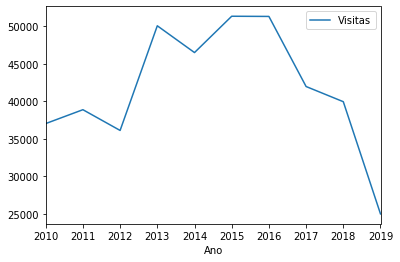

In [526]:
Estabelecimentos.plot.line(y='Visitas')

#### O gráfico usado foi o de linha por ser melhor de ser entendido.

# <H3>  4. Qual o estado que os partidos mais gastaram?

In [527]:
def plotaQuestao4(sgUF, ano, cor):
    sgUF['sgUF'].value_counts().plot.bar(figsize=(16, 8), color=cor)
    plt.xlabel('Estado', size=20) 
    plt.ylabel('Número de ocorrências', size=20) 
    plt.title('Relação de serviços utilizados por partidos no Brasil - Ano ' + ano, size=20)
    plt.show()

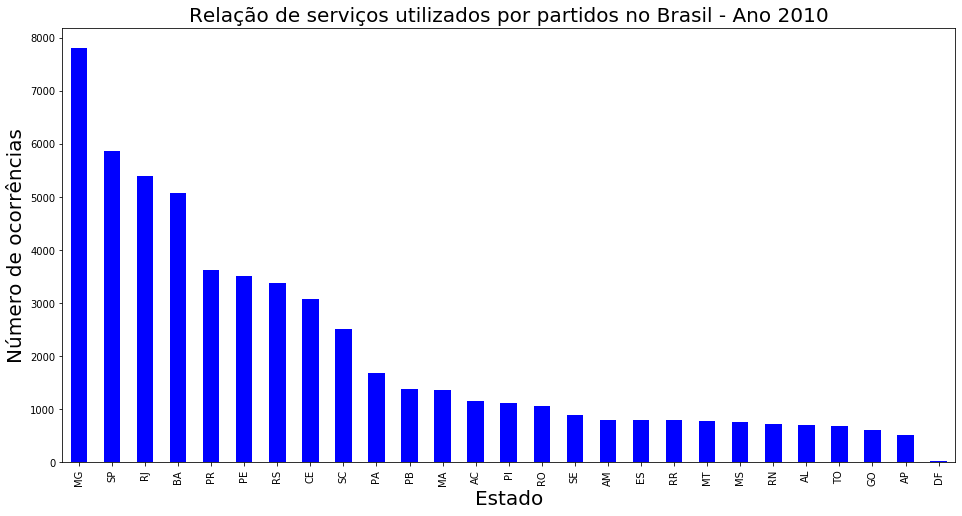

In [528]:
plotaQuestao4(anos[0], '2010', 'b')

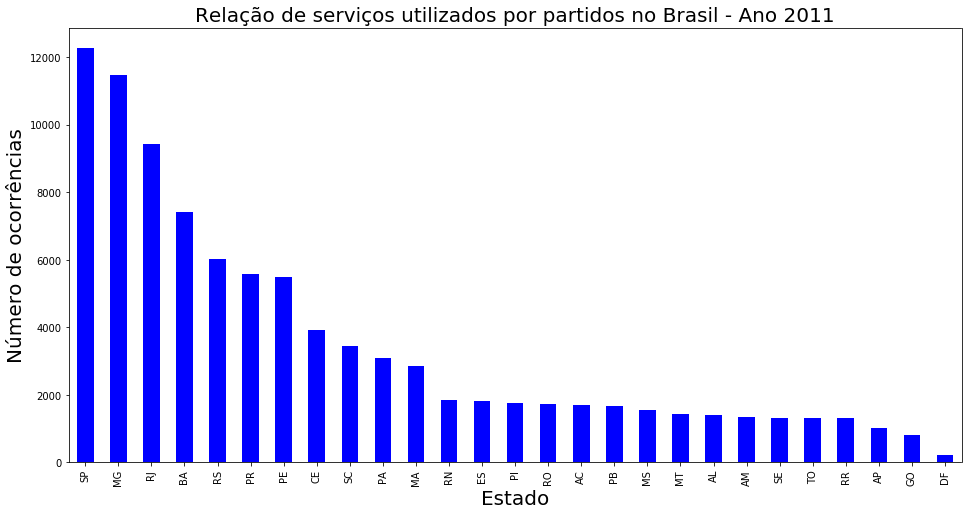

In [529]:
plotaQuestao4(anos[1], '2011', 'b')

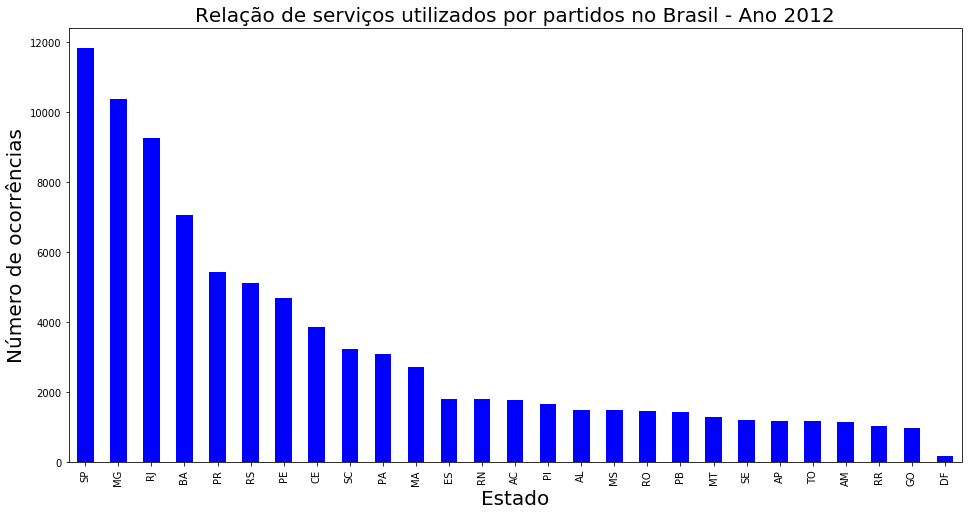

In [530]:
plotaQuestao4(anos[2], '2012', 'b')

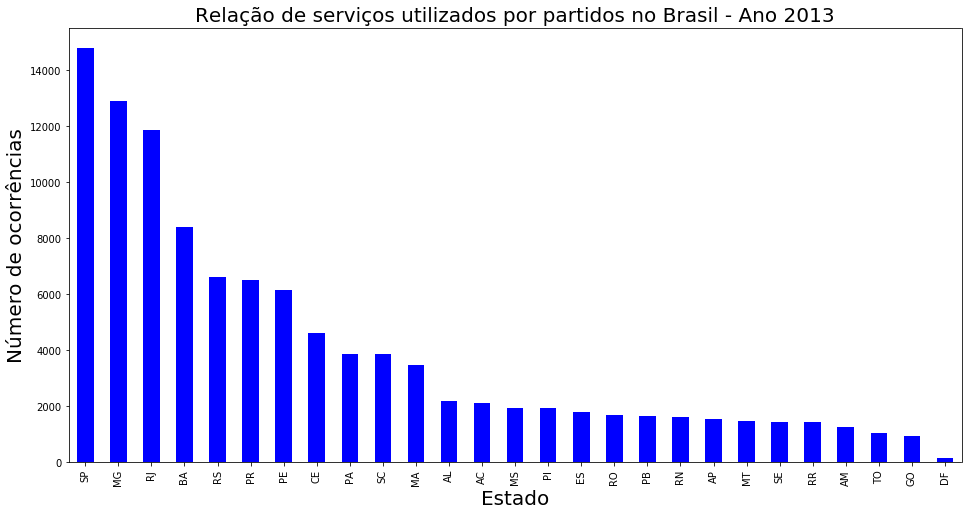

In [531]:
plotaQuestao4(anos[3], '2013', 'b')

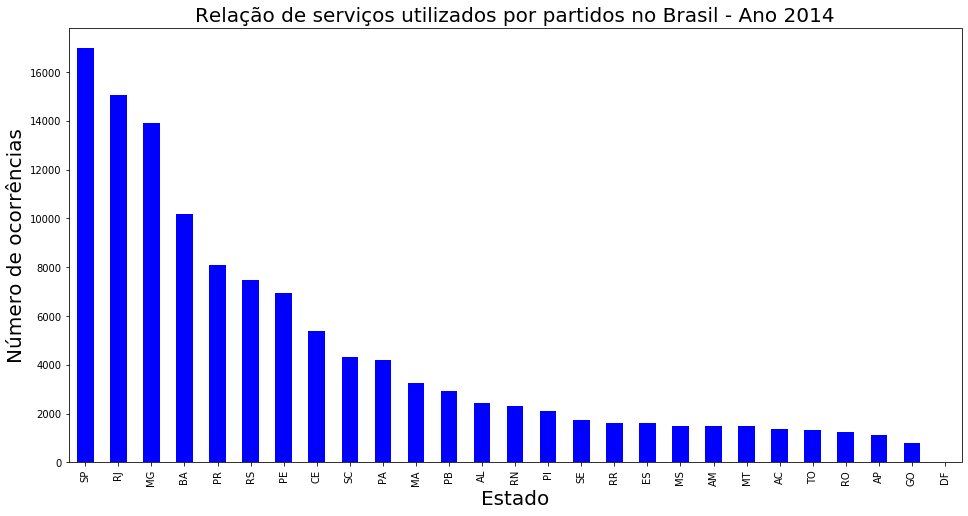

In [532]:
plotaQuestao4(anos[5], '2014', 'b')

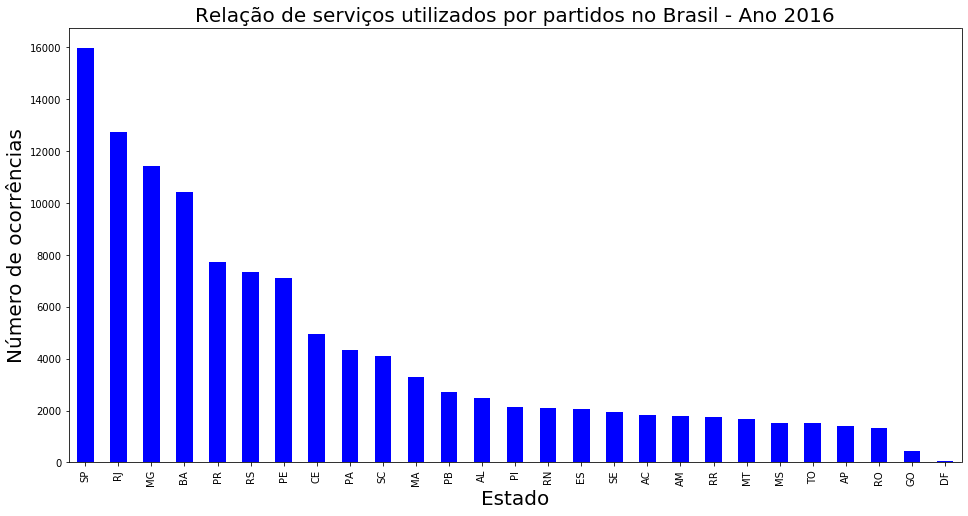

In [533]:
plotaQuestao4(anos[6], '2016', 'b')

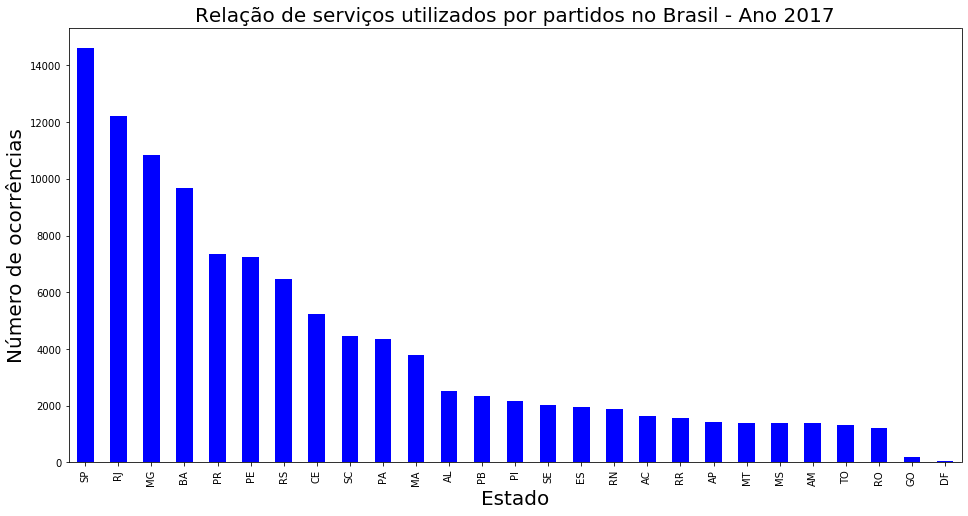

In [534]:
plotaQuestao4(anos[7], '2017', 'b')

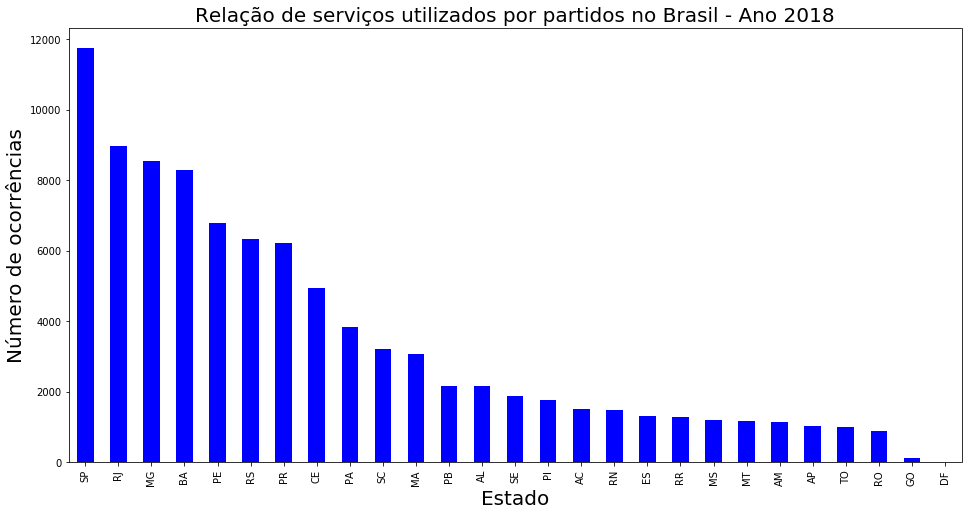

In [535]:
plotaQuestao4(anos[8], '2018', 'b')

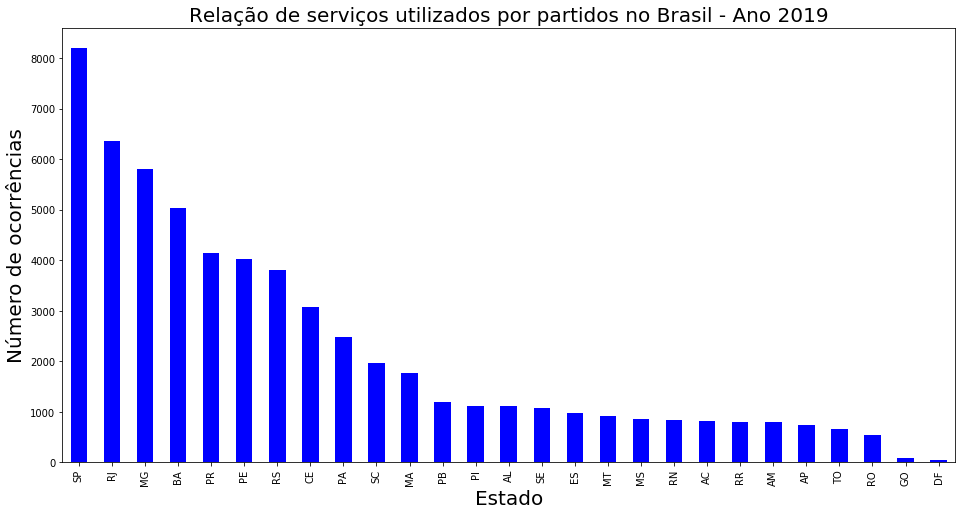

In [536]:
plotaQuestao4(anos[9], '2019', 'b')

# <H3> 5. Qual foi o deputado que mais gastou em cada ano, o estado, o valor, e o serviço?

In [537]:
ano = 0
meses = 'Jan.Fev.Mar.Abr.Maio.Jun.Jul.Ago.Set.Out.Nov.Dez'.split('.')
for tabela in anos:
    deputado = tabela.loc[tabela['vlrDocumento'].idxmax()]
    print("Ano 201"+str(ano),
          '\n\t Deputado: '+deputado[0], 
          '\n\t Estado: '+deputado[1], 
          '\n\t Valor:', 'R$', deputado[7],
          '\n\t Serviço: ', deputado[4],
          '\n\t Mês:', meses[deputado[8]-1],'\n')
    ano += 1

Ano 2010 
	 Deputado: SILAS CÂMARA 
	 Estado: AM 
	 Valor: R$ 73000.0 
	 Serviço:  PASSAGENS AÉREAS 
	 Mês: Abr 

Ano 2011 
	 Deputado: SILAS CÂMARA 
	 Estado: AM 
	 Valor: R$ 67800.0 
	 Serviço:  PASSAGENS AÉREAS 
	 Mês: Nov 

Ano 2012 
	 Deputado: SILAS CÂMARA 
	 Estado: AM 
	 Valor: R$ 63000.0 
	 Serviço:  PASSAGENS AÉREAS 
	 Mês: Maio 

Ano 2013 
	 Deputado: SABINO CASTELO BRANCO 
	 Estado: AM 
	 Valor: R$ 80000.0 
	 Serviço:  PASSAGENS AÉREAS 
	 Mês: Mar 

Ano 2014 
	 Deputado: ALEXANDRE SANTOS 
	 Estado: RJ 
	 Valor: R$ 18927.8 
	 Serviço:  PASSAGENS AÉREAS 
	 Mês: Abr 

Ano 2015 
	 Deputado: NEWTON CARDOSO JR 
	 Estado: MG 
	 Valor: R$ 46988.8 
	 Serviço:  PASSAGENS AÉREAS 
	 Mês: Jul 

Ano 2016 
	 Deputado: IRACEMA PORTELLA 
	 Estado: PI 
	 Valor: R$ 20144.5 
	 Serviço:  PASSAGENS AÉREAS 
	 Mês: Jun 

Ano 2017 
	 Deputado: JOSÉ ROCHA 
	 Estado: BA 
	 Valor: R$ 15000.0 
	 Serviço:  PASSAGENS AÉREAS 
	 Mês: Nov 

Ano 2018 
	 Deputado: EDUARDO CURY 
	 Estado: SP 
	 Valor: R$ 10063

#### Não utilizamos gráfico para está aplicação apenas para não fazer uma sobrecarga de dados.

# <H3> 6. Qual foi o gasto total por descrição de subcota?

In [538]:
def plotaQuestao6(ano, anoTitulo):
    teste = ano.iloc[:,[9,17]].groupby('txtDescricao').sum()
    teste.columns = ['subCota']
    teste.sort_values(by='subCota', ascending =False, inplace=True)
    teste.plot.bar(figsize=(18,9))
    plt.xlabel('Estado', size=20) 
    plt.ylabel('Número de ocorrências', size=20) 
    plt.title('Relação de subCotas por ano ' + anoTitulo, size=20)


#### Fizemos a relação m gráfico de barras por ser de melhor compreensão em relação aos outros debatidos, além de que tinhamos um diversidade em relação aos tipos de sub cotas.

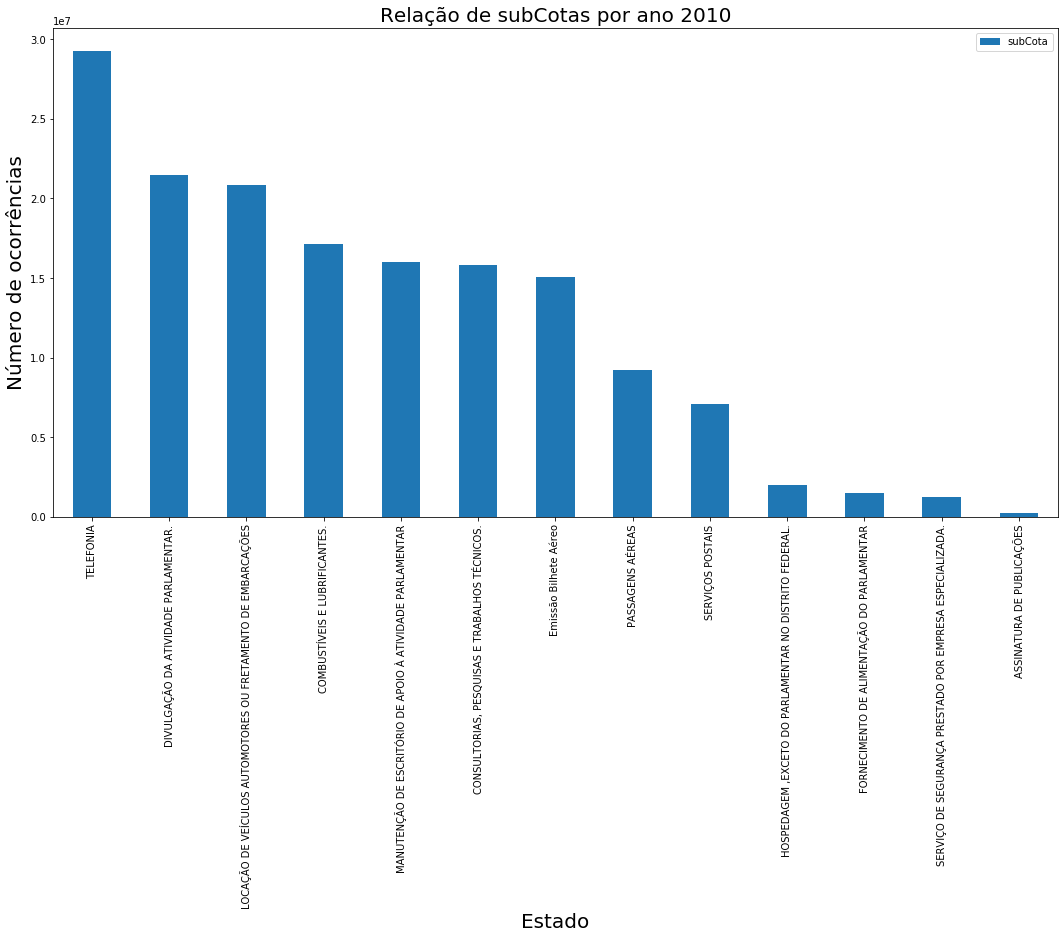

In [539]:
plotaQuestao6(dados2010, '2010')

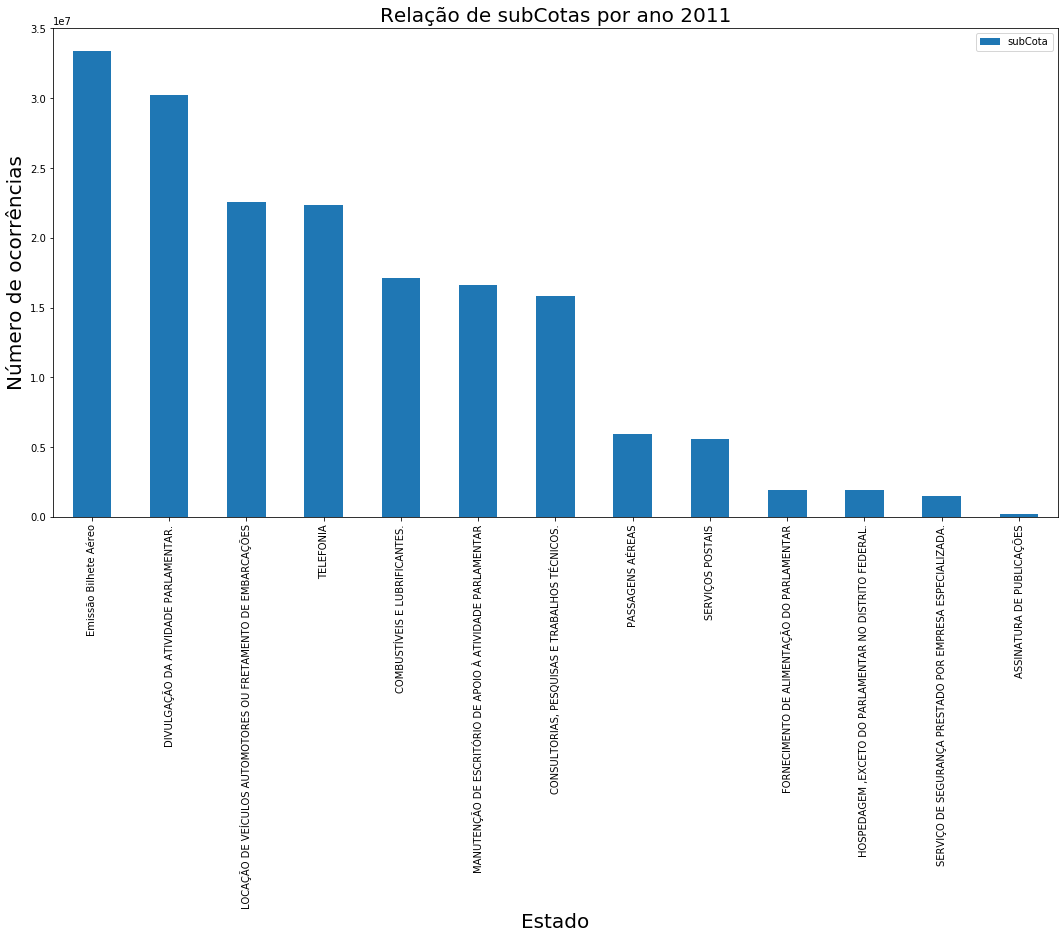

In [540]:
plotaQuestao6(dados2011, '2011')

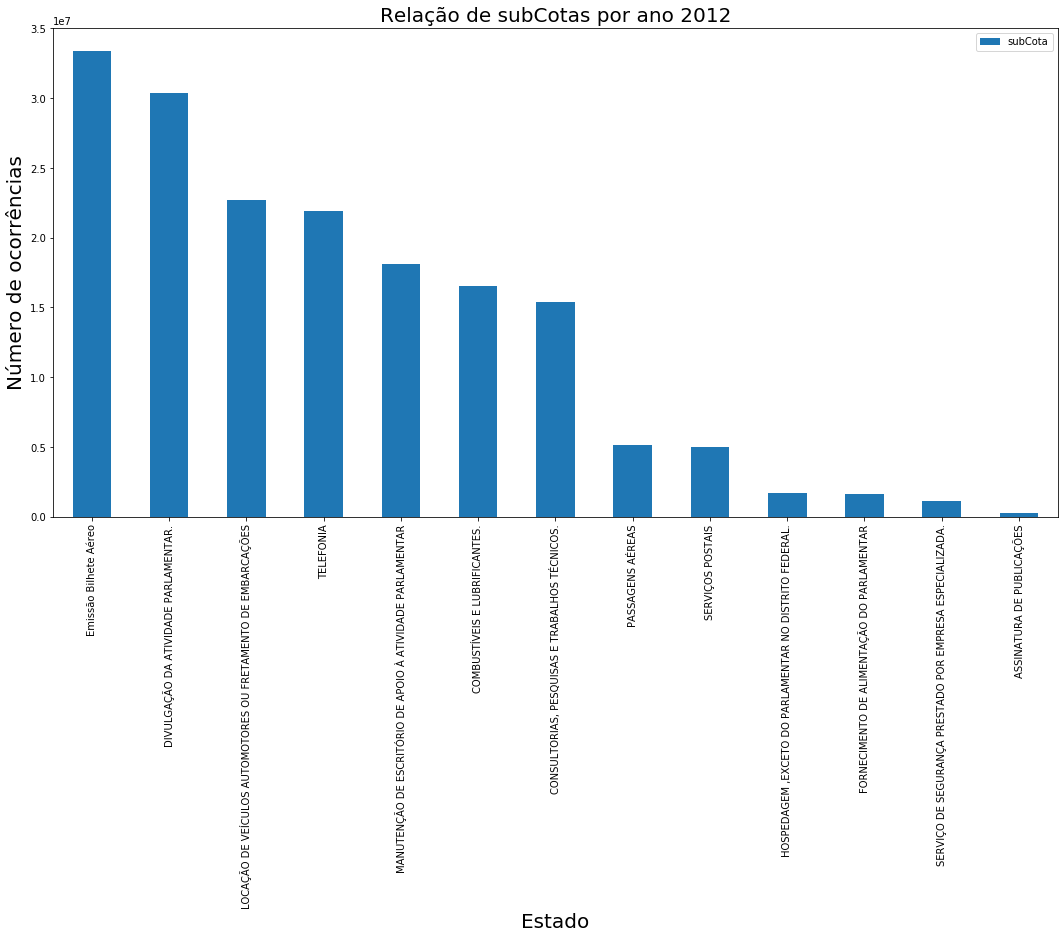

In [541]:
plotaQuestao6(dados2012, '2012')

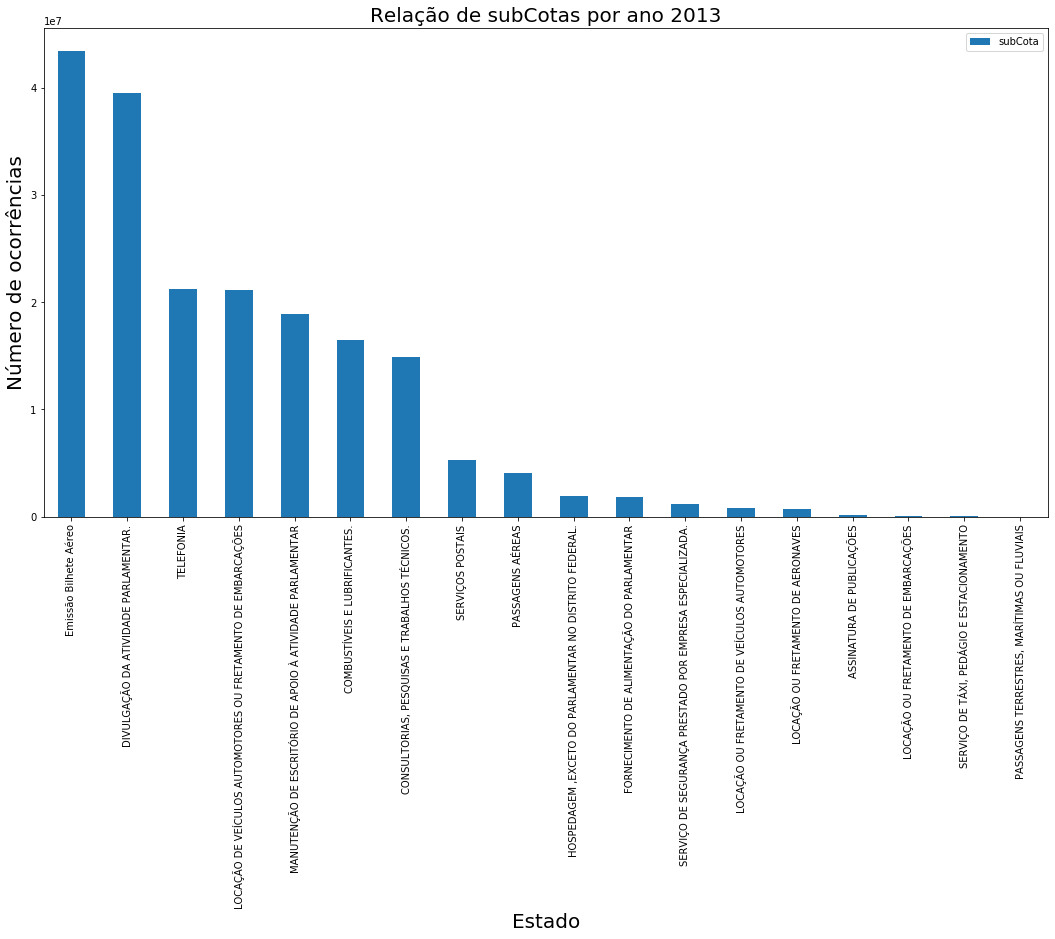

In [542]:
plotaQuestao6(dados2013, '2013')

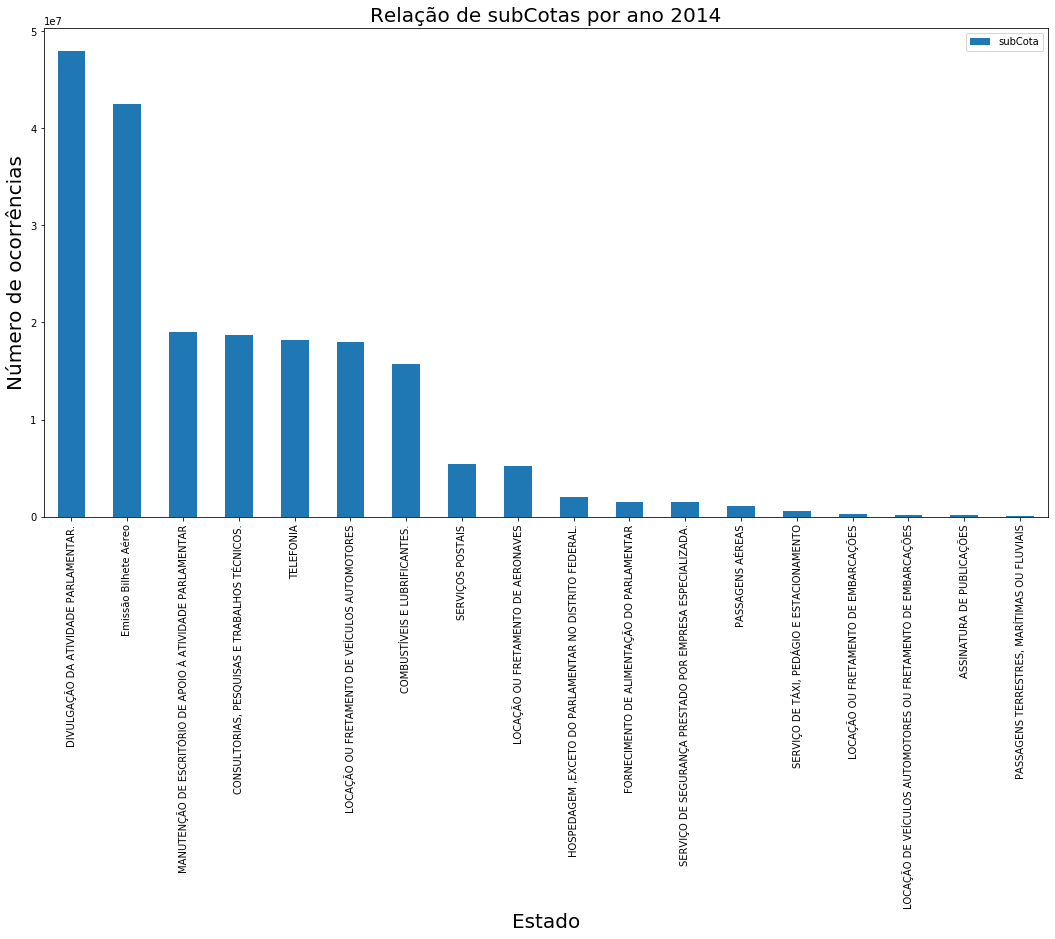

In [543]:
plotaQuestao6(dados2014, '2014')

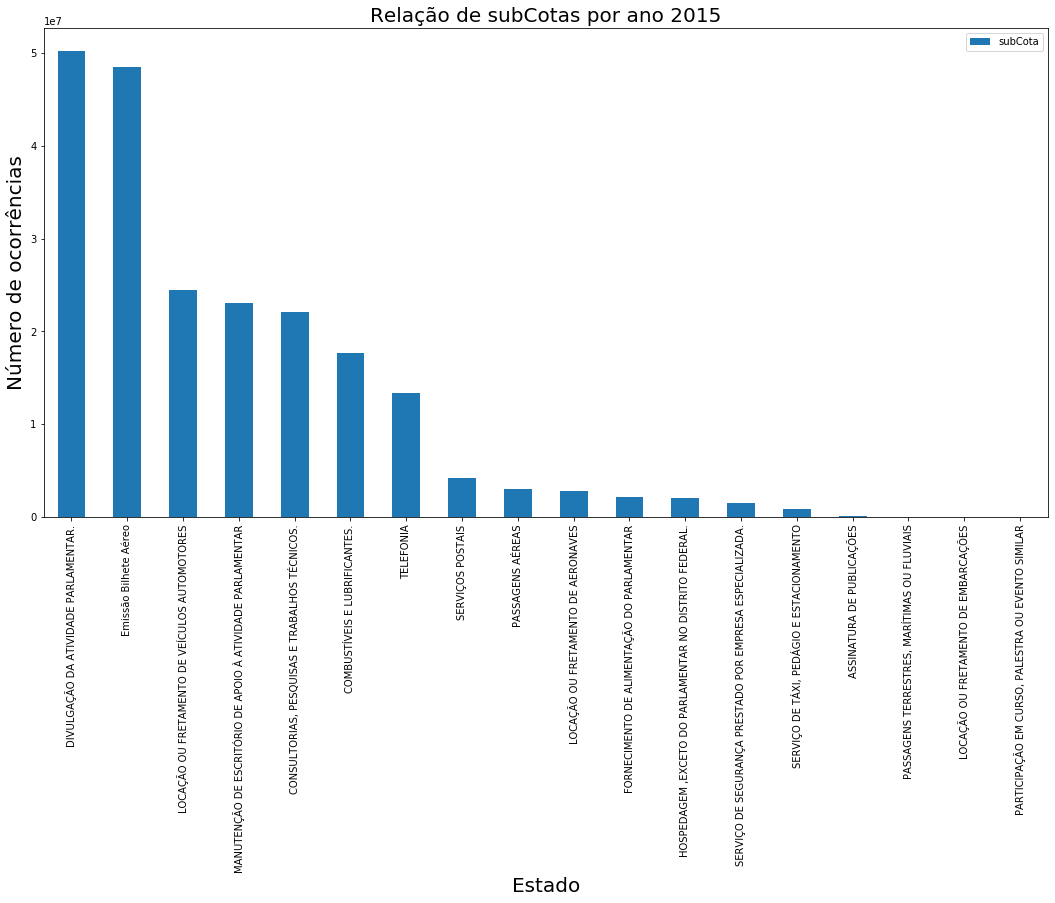

In [544]:
plotaQuestao6(dados2015, '2015')

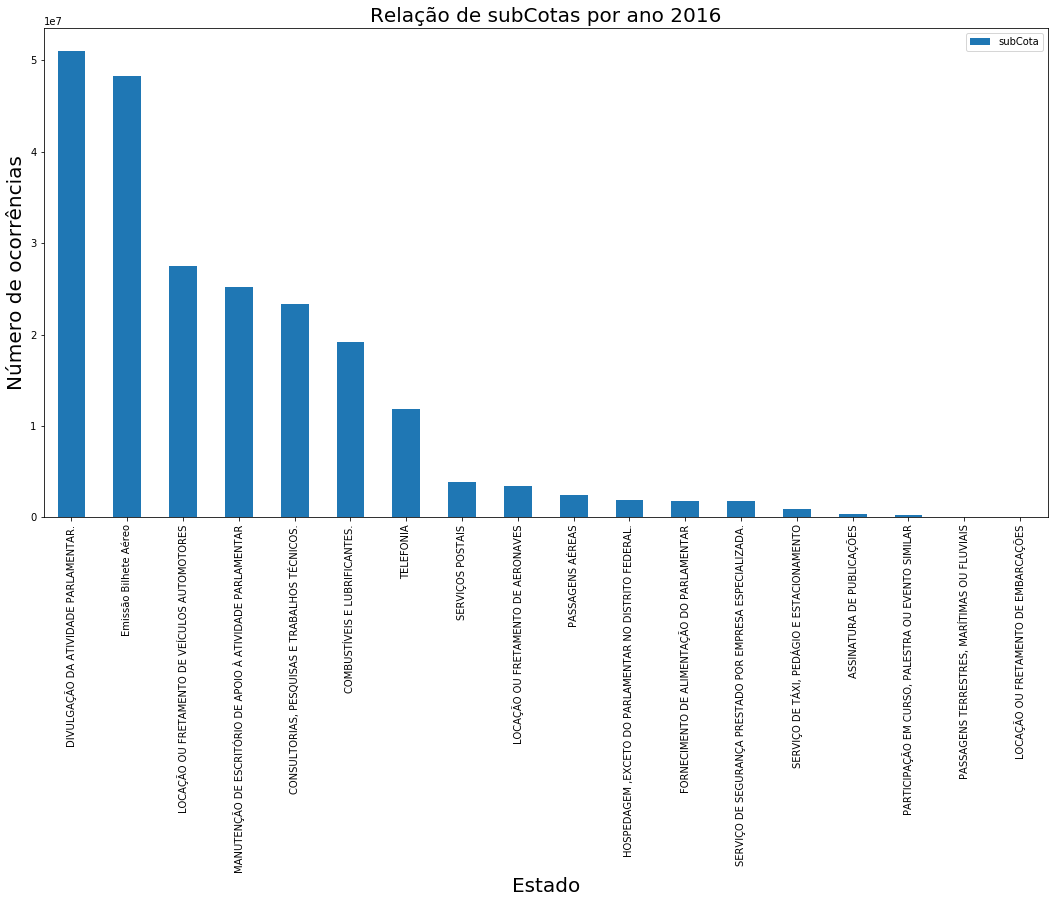

In [545]:
plotaQuestao6(dados2016, '2016')

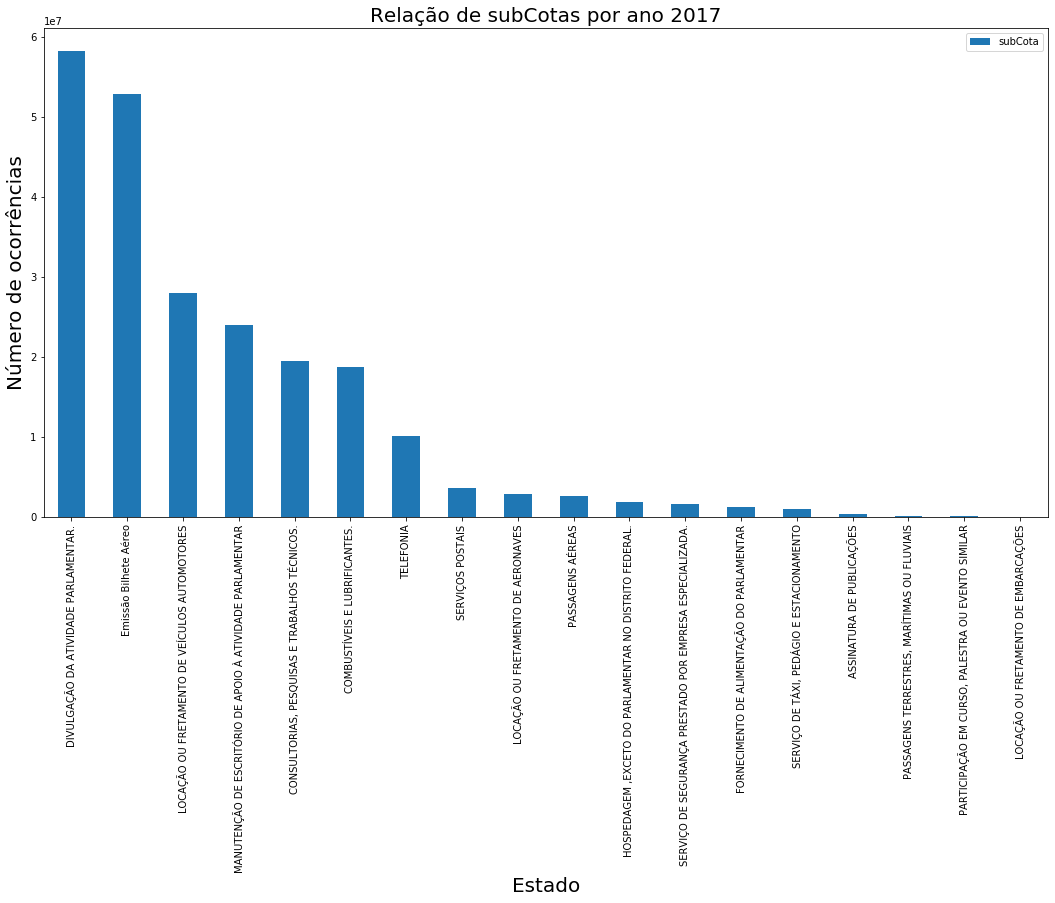

In [546]:
plotaQuestao6(dados2017, '2017')

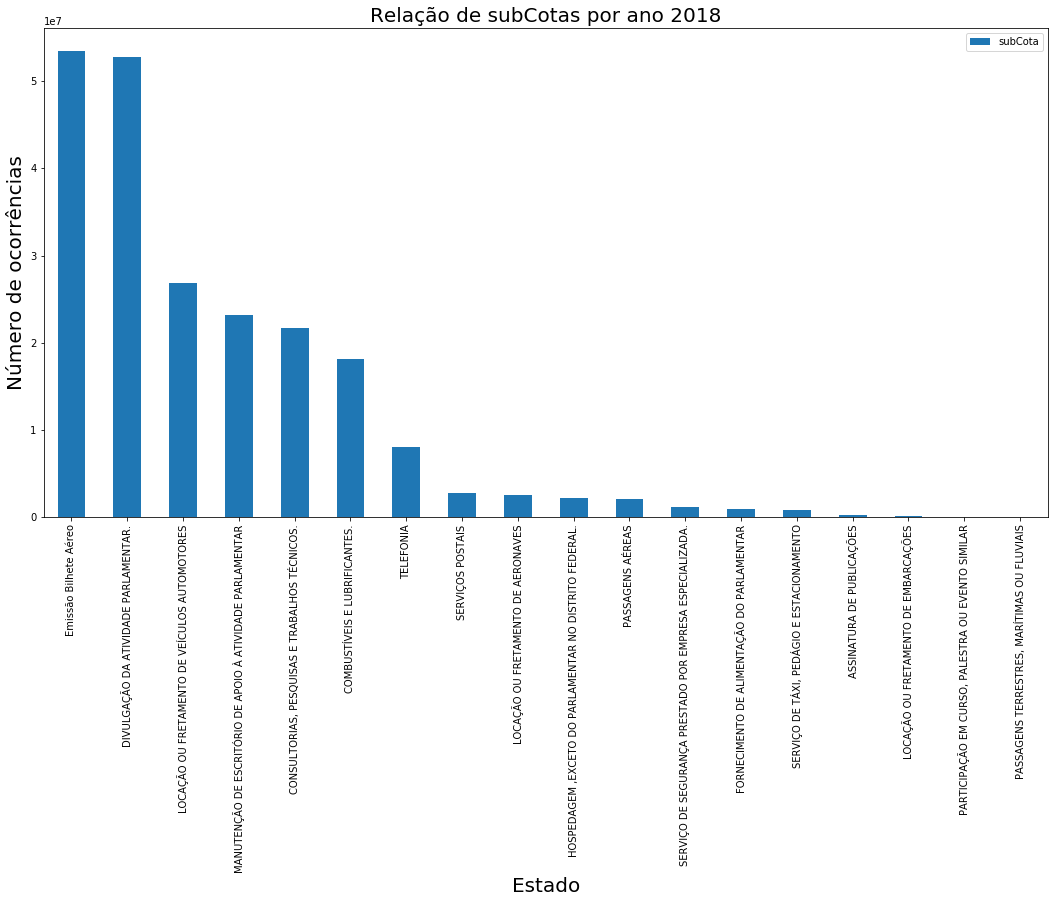

In [547]:
plotaQuestao6(dados2018, '2018')

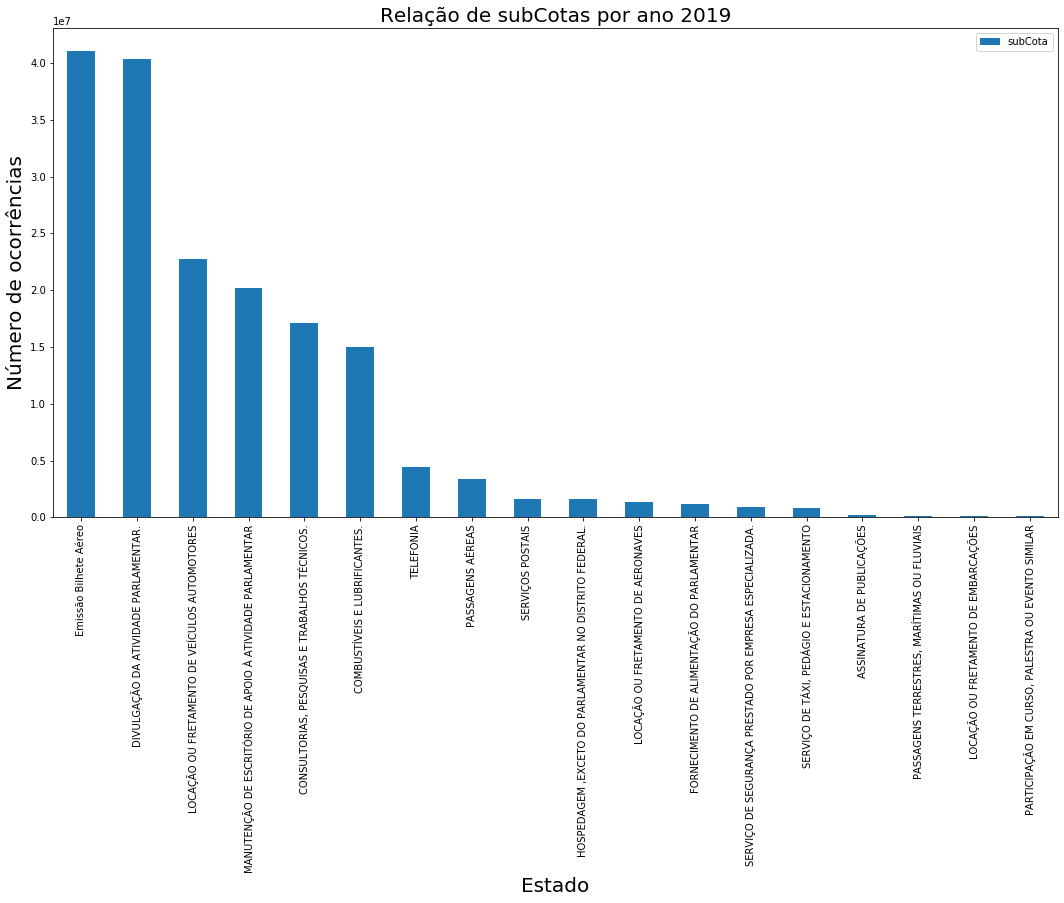

In [548]:
plotaQuestao6(dados2019, '2019')

# <H3> 7. Qual foi a subcota que mais foi gasta por ano?</h3>

In [549]:
def plotaQuestao7(ano, anoTitulo):
    ano.value_counts(normalize=True).plot.pie(figsize=(10,5)

#### O gráfico de pizza foi melhor para exibir cada questão de gasto por ser mais dinâmico.

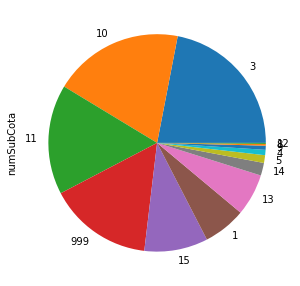

In [550]:
plotaQuestao7(dados2010['numSubCota'], '2010')

# <H3> 8. Top 10: os 10 parlamentares que + gastaram por ano.

In [551]:
teste = anos[0].iloc[:,[0, 7]].groupby('txNomeParlamentar').sum()
teste.sort_values(by='vlrDocumento', ascending=False).iloc[0:10,:]

,vlrDocumento
txNomeParlamentar,
ZÉ VIEIRA,344460.98
ROBERTO ROCHA,257062.36
MÁRIO NEGROMONTE,219326.78
ILDERLEI CORDEIRO,211881.84
MARCELO SERAFIM,199135.52
CARLOS BRANDÃO,194488.90
JOÃO LEÃO,192572.58
ÁTILA LINS,179974.40
GLADSON CAMELI,179949.32


In [552]:
teste = anos[1].iloc[:,[0, 7]].groupby('txNomeParlamentar').sum()
teste.sort_values(by='vlrDocumento', ascending=False).iloc[0:10,:]

,vlrDocumento
txNomeParlamentar,
WLADIMIR COSTA,253735.32
SABINO CASTELO BRANCO,242252.01
SILAS CÂMARA,233257.29
HENRIQUE EDUARDO ALVES,226709.44
ÁTILA LINS,226465.66
WALDIR MARANHÃO,215255.46
JOSÉ ROCHA,211483.77
PAES LANDIM,210869.31
INOCÊNCIO OLIVEIRA,201593.12


In [553]:
teste = anos[2].iloc[:,[0, 7]].groupby('txNomeParlamentar').sum()
teste.sort_values(by='vlrDocumento', ascending=False).iloc[0:10,:]

,vlrDocumento
txNomeParlamentar,
MÁRIO NEGROMONTE,248568.44
HENRIQUE EDUARDO ALVES,245563.07
SABINO CASTELO BRANCO,236260.44
WLADIMIR COSTA,234562.29
WALDIR MARANHÃO,215347.98
PAES LANDIM,209474.66
MARCELO CASTRO,205066.90
ÁTILA LINS,204989.84
VICENTE ARRUDA,191903.46


In [554]:
teste = anos[3].iloc[:,[0, 7]].groupby('txNomeParlamentar').sum()
teste.sort_values(by='vlrDocumento', ascending=False).iloc[0:10,:]

,vlrDocumento
txNomeParlamentar,
SABINO CASTELO BRANCO,334772.42
ÁTILA LINS,289192.03
JOÃO PIZZOLATTI,278091.39
ANTHONY GAROTINHO,227320.03
EDUARDO DA FONTE,218381.15
ELIENE LIMA,216064.05
PAES LANDIM,213581.17
WALDIR MARANHÃO,207568.05
MARINHA RAUPP,207072.41


In [555]:
teste = anos[4].iloc[:,[0, 7]].groupby('txNomeParlamentar').sum()
teste.sort_values(by='vlrDocumento', ascending=False).iloc[0:10,:]

,vlrDocumento
txNomeParlamentar,
MARCO MAIA,265163.96
JOÃO PIZZOLATTI,235172.26
PAULO PEREIRA DA SILVA,223783.55
PAULO FREIRE COSTA,215156.04
LOURIVAL MENDES,215043.19
PERPÉTUA ALMEIDA,213062.64
DOMINGOS DUTRA,207751.20
CLÁUDIO PUTY,205737.65
WLADIMIR COSTA,200845.79


In [556]:
teste = anos[5].iloc[:,[0, 7]].groupby('txNomeParlamentar').sum()
teste.sort_values(by='vlrDocumento', ascending=False).iloc[0:10,:]

,vlrDocumento
txNomeParlamentar,
PAULO PEREIRA DA SILVA,307892.36
LEONARDO PICCIANI,266518.23
MARINALDO ROSENDO,263533.16
CARLOS SAMPAIO,252600.50
ONYX LORENZONI,238519.45
PAULO FREIRE COSTA,230520.99
ARTHUR VIRGÍLIO BISNETO,216333.07
EDMILSON RODRIGUES,213673.91
SÉRGIO MORAES,213563.42


In [557]:
teste = anos[6].iloc[:,[0, 7]].groupby('txNomeParlamentar').sum()
teste.sort_values(by='vlrDocumento', ascending=False).iloc[0:10,:]

,vlrDocumento
txNomeParlamentar,
PAULO PEREIRA DA SILVA,281540.09
ONYX LORENZONI,274525.46
MARINALDO ROSENDO,254014.97
ARTHUR VIRGÍLIO BISNETO,245266.72
WLADIMIR COSTA,244941.11
EDMILSON RODRIGUES,228982.54
DANRLEI DE DEUS HINTERHOLZ,217350.44
BONIFÁCIO DE ANDRADA,216560.09
EDUARDO BOLSONARO,214891.76


In [558]:
teste = anos[7].iloc[:,[0, 7]].groupby('txNomeParlamentar').sum()
teste.sort_values(by='vlrDocumento', ascending=False).iloc[0:10,:]

,vlrDocumento
txNomeParlamentar,
MARINALDO ROSENDO,390521.33
SERGIO ZVEITER,329178.74
WLADIMIR COSTA,250997.35
ONYX LORENZONI,245139.26
BONIFÁCIO DE ANDRADA,241590.22
MIRO TEIXEIRA,238890.18
PAULO MALUF,237531.21
MARCOS SOARES,228237.02
PAULO PEREIRA DA SILVA,227262.21


In [559]:
teste = anos[8].iloc[:,[0, 7]].groupby('txNomeParlamentar').sum()
teste.sort_values(by='vlrDocumento', ascending=False).iloc[0:10,:]

,vlrDocumento
txNomeParlamentar,
MARINALDO ROSENDO,392660.01
ALFREDO KAEFER,343232.09
MIRO TEIXEIRA,277329.77
RONALDO NOGUEIRA,276447.66
HISSA ABRAHÃO,266508.35
SERGIO ZVEITER,253840.43
PAULO FREIRE COSTA,252163.49
WALDIR MARANHÃO,249598.75
ARTHUR LIRA,249245.33


In [560]:
teste = anos[9].iloc[:,[0, 7]].groupby('txNomeParlamentar').sum()
teste.sort_values(by='vlrDocumento', ascending=False).iloc[0:10,:]

,vlrDocumento
txNomeParlamentar,
PAULO PEREIRA DA SILVA,222245.28
PAULO FREIRE COSTA,204597.96
ARTHUR LIRA,204107.42
PR. MARCO FELICIANO,203226.71
CARLOS SAMPAIO,195144.28
CELSO RUSSOMANNO,194212.23
AUREO RIBEIRO,188396.87
GUILHERME MUSSI,186525.76
RUBENS BUENO,185078.41


# <H3> 9. O valor que os estados gastaram por ano.

In [561]:
def plotaQuestao9(ano, anoTitulo):
    teste = ano.iloc[:,[0, 1, 7]].groupby('sgUF').sum()
    teste.columns = ['Valor Documento']
    teste.plot.bar(figsize=(18,9))
    plt.xlabel('Estado', size=20) 
    plt.ylabel('Número de ocorrências', size=20) 
    plt.title('Relação de estados por ano ' + anoTitulo, size=20)

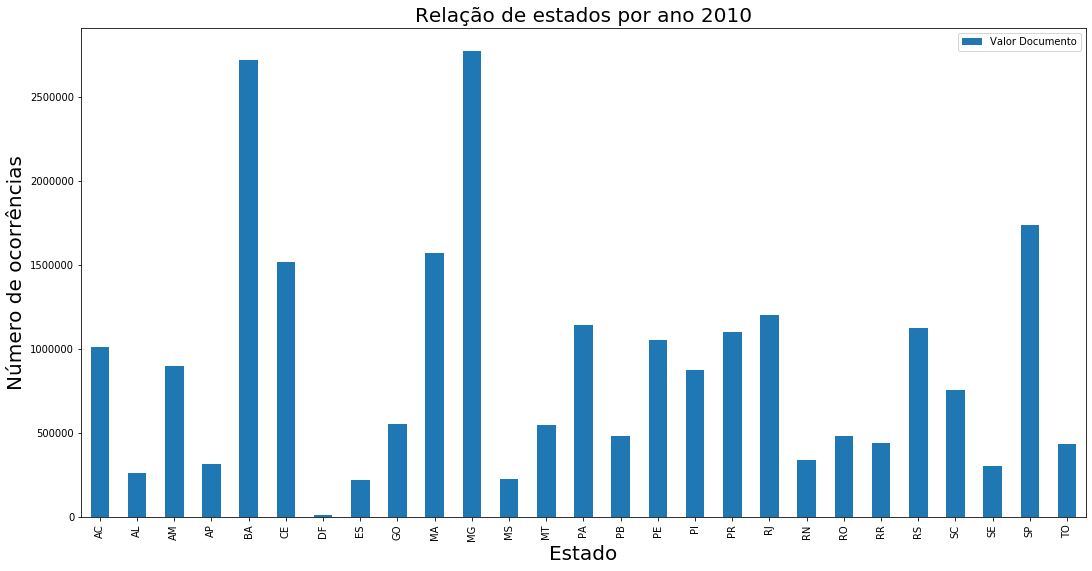

In [562]:
plotaQuestao9(anos[0], '2010')

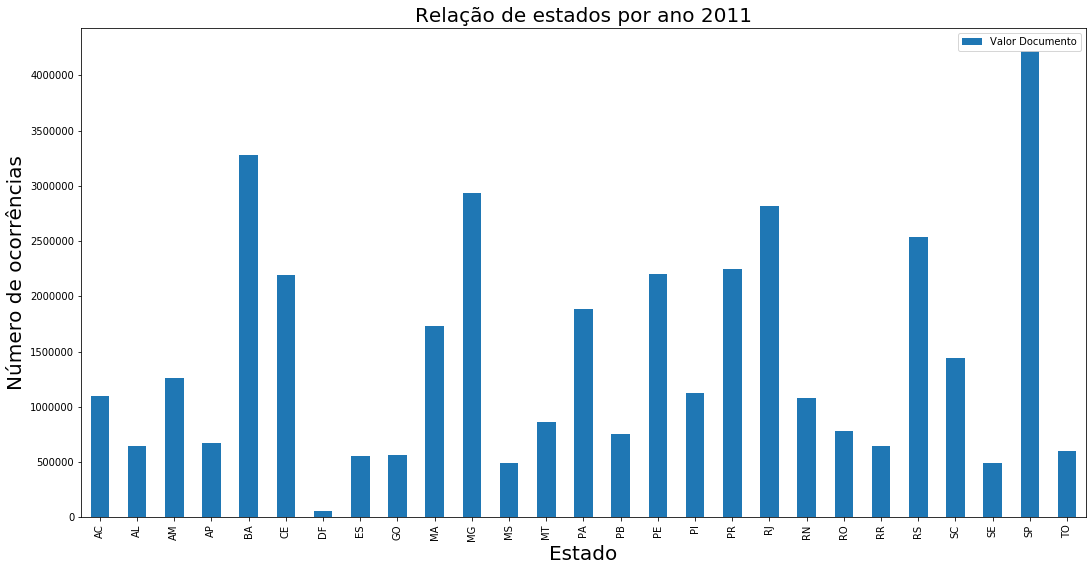

In [563]:
plotaQuestao9(anos[1], '2011')

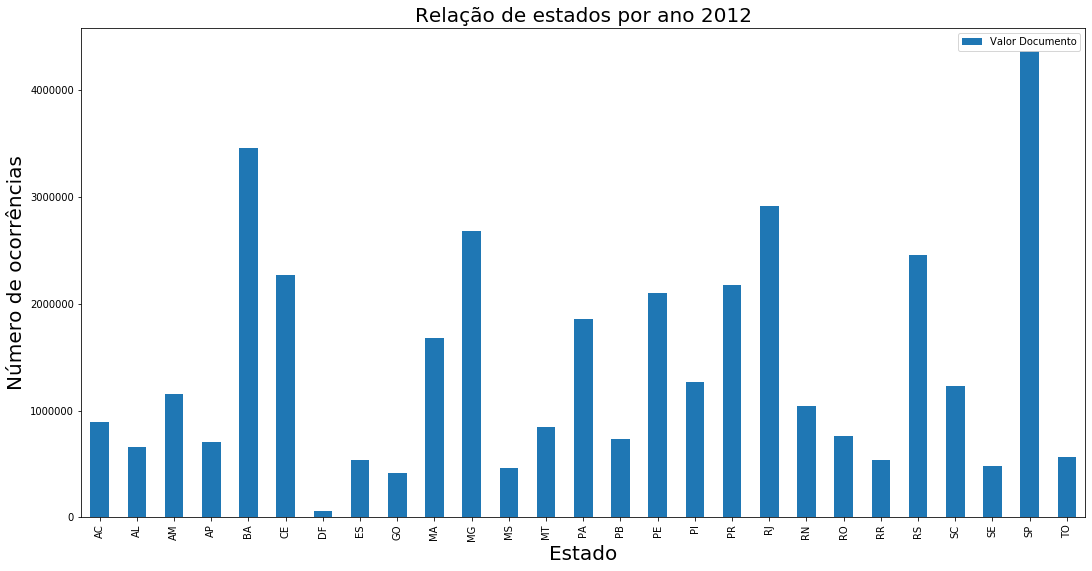

In [564]:
plotaQuestao9(anos[2], '2012')

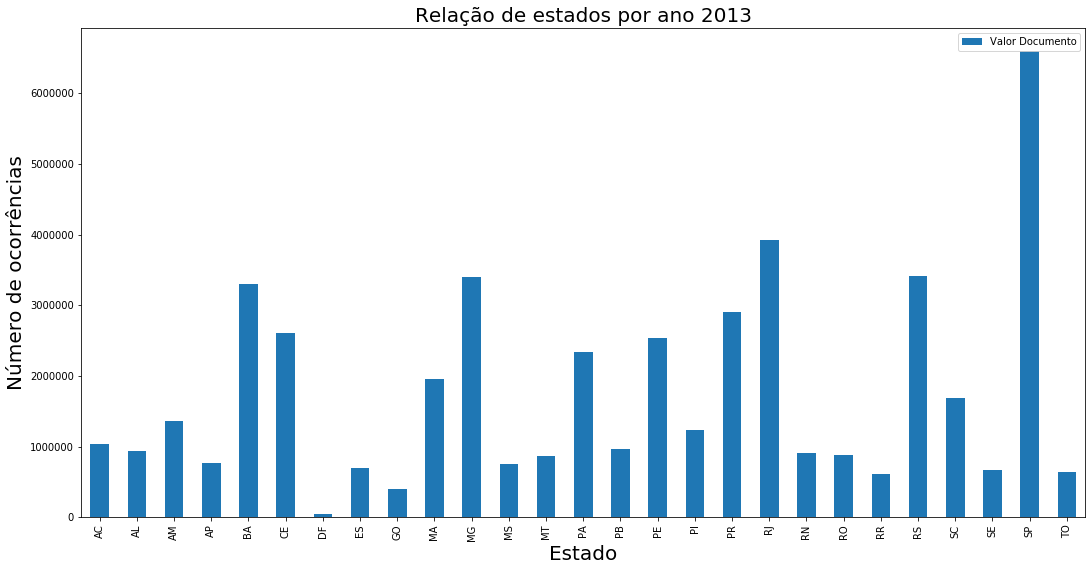

In [565]:
plotaQuestao9(anos[3], '2013')

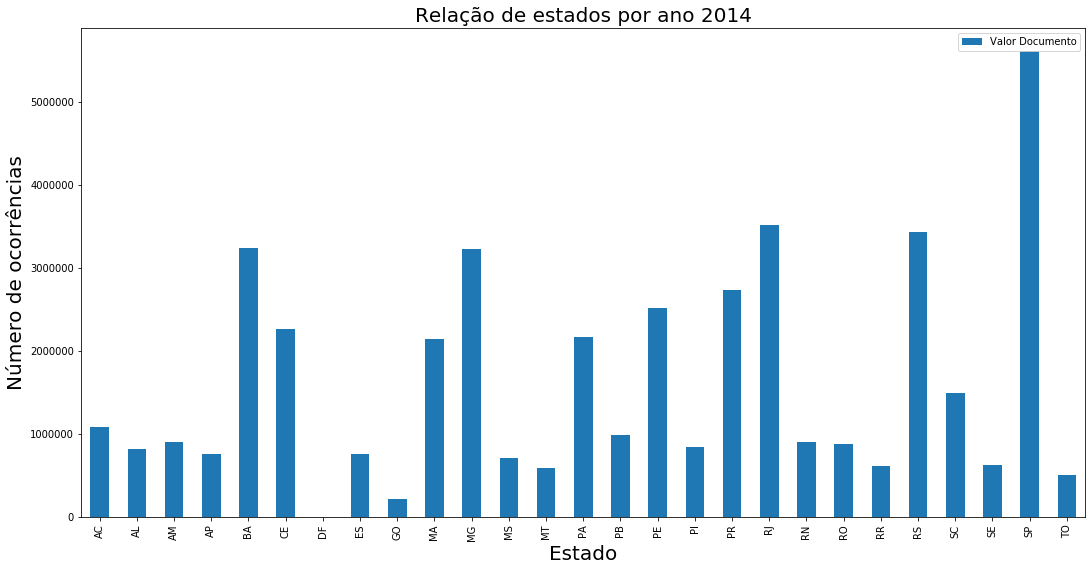

In [566]:
plotaQuestao9(anos[4], '2014')

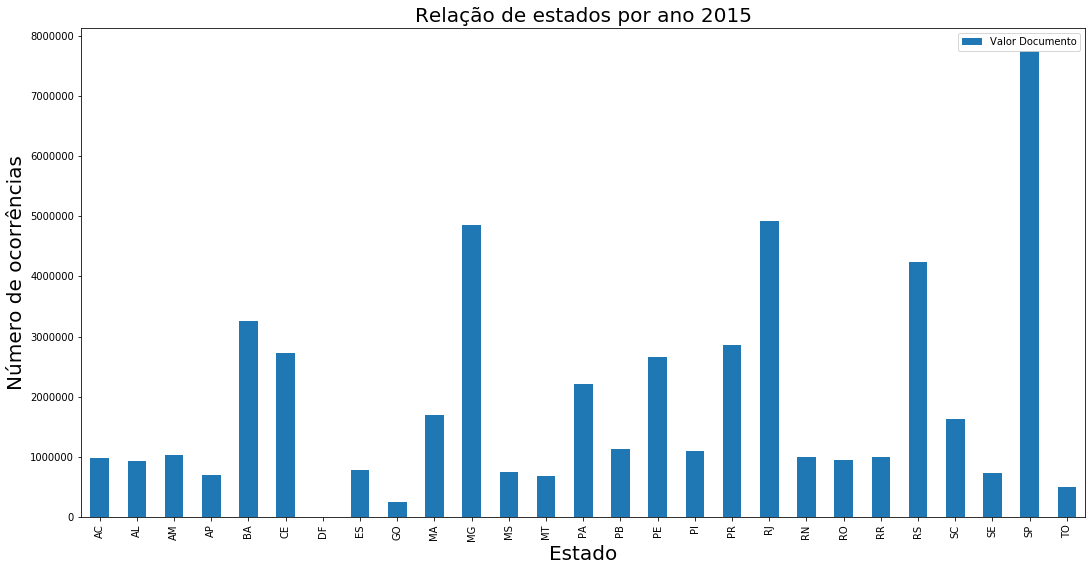

In [567]:
plotaQuestao9(anos[5], '2015')

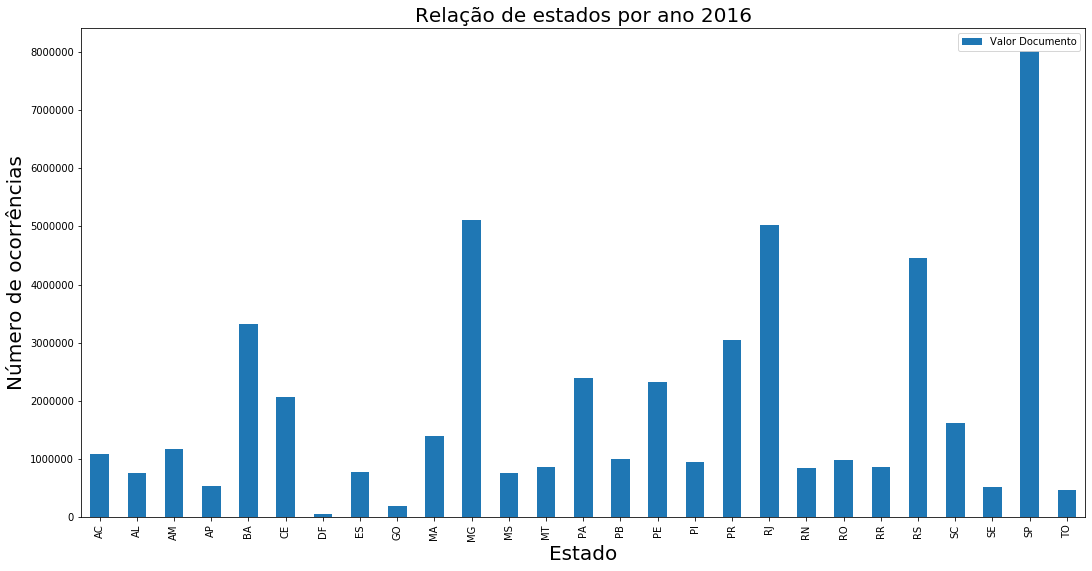

In [568]:
plotaQuestao9(anos[6], '2016')

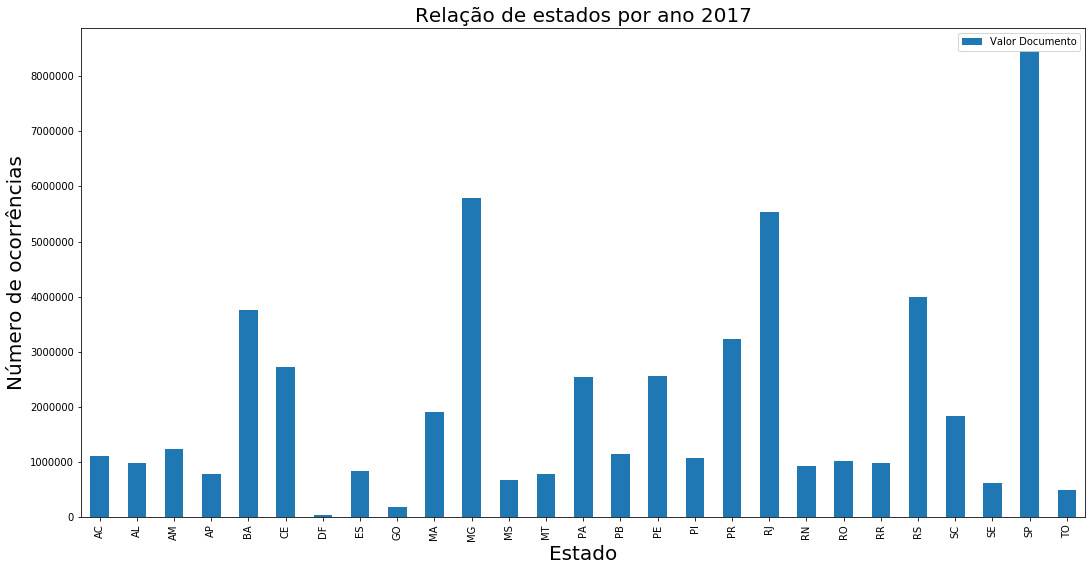

In [569]:
plotaQuestao9(anos[7], '2017')

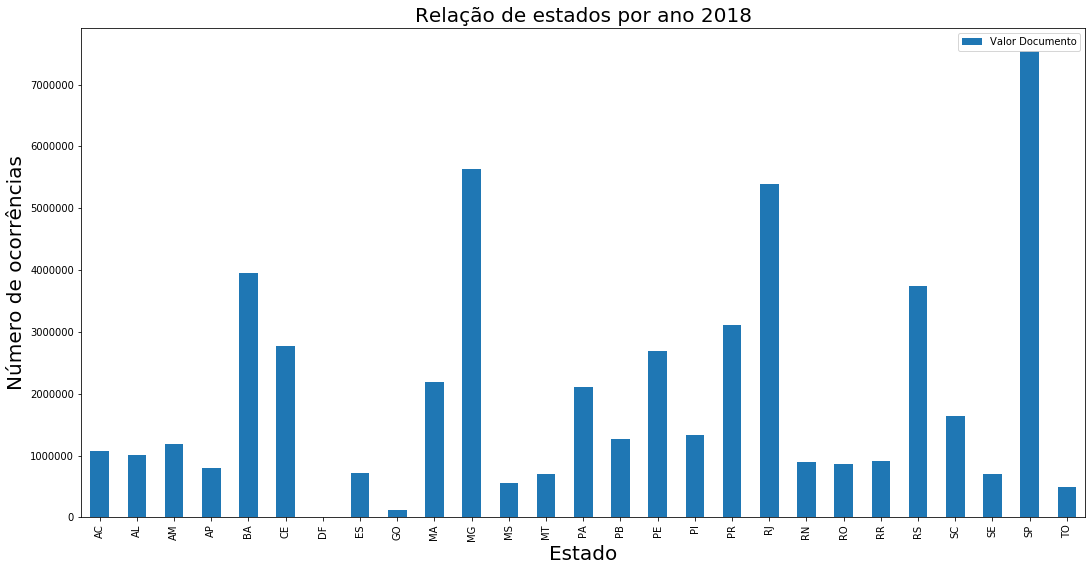

In [570]:
plotaQuestao9(anos[8], '2018')

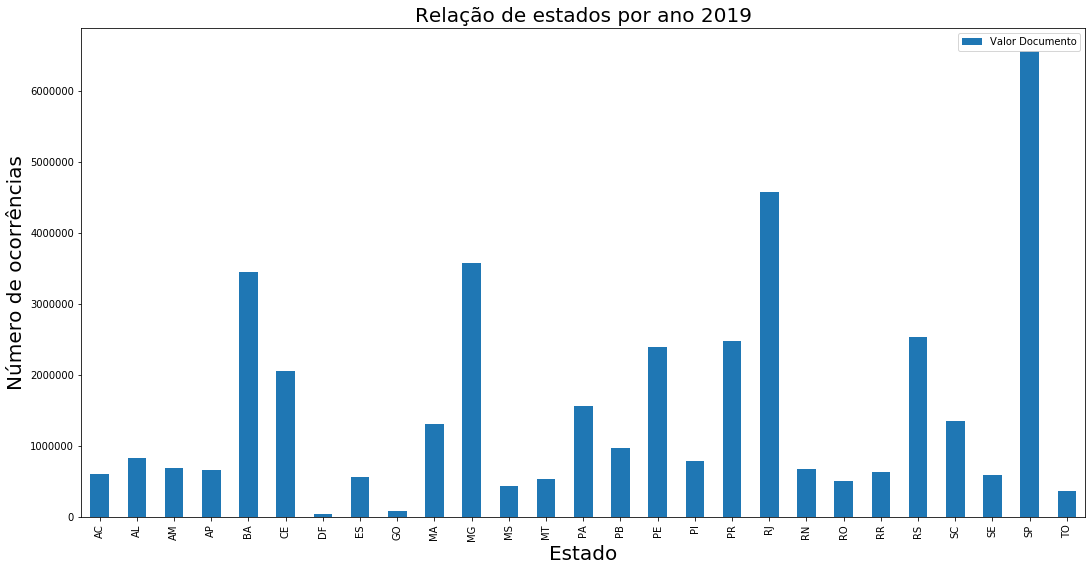

In [571]:
plotaQuestao9(anos[9], '2019')

# <H3> 10. Top 10: os partidos que mais gastaram por ano.

In [572]:
def plotaQuestao10(ano, anoTitulo):
    teste = anos[0].iloc[:,[0, 2, 7]].groupby('sgPartido').sum()
    teste.plot.barh(figsize=(18,9))
    #plt.pie(x='sgPartido')
    

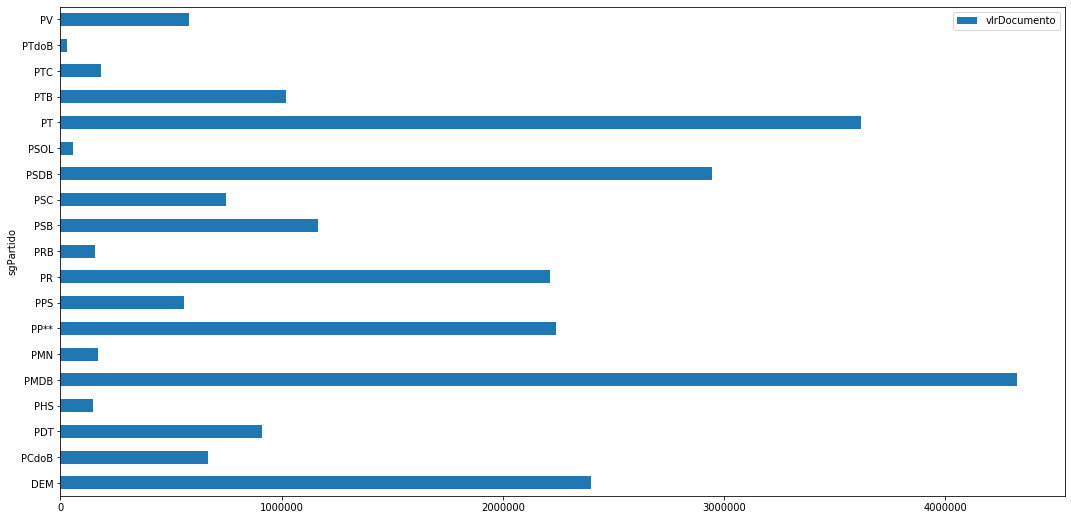

In [573]:
plotaQuestao10(anos[0], '2010')

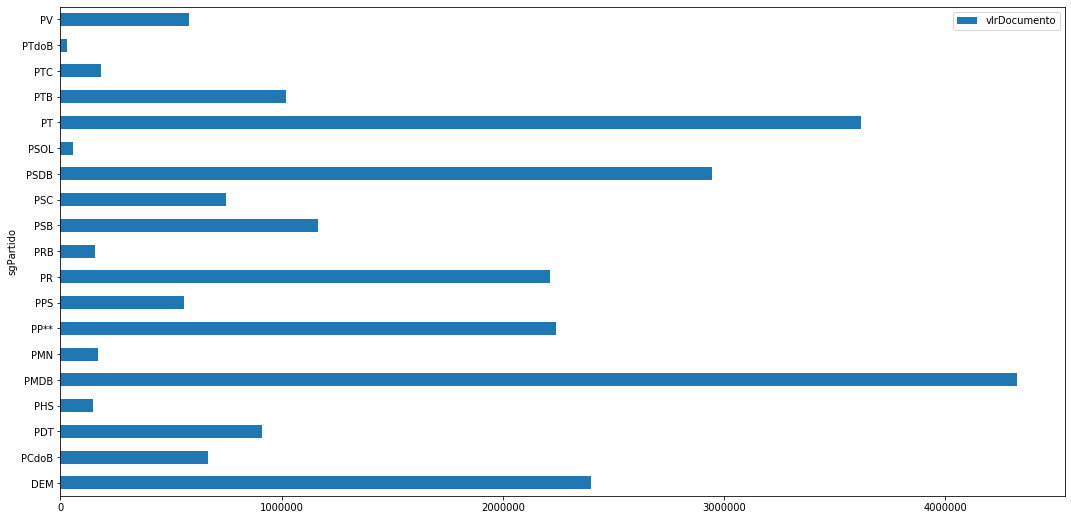

In [574]:
plotaQuestao10(anos[1], '2011')

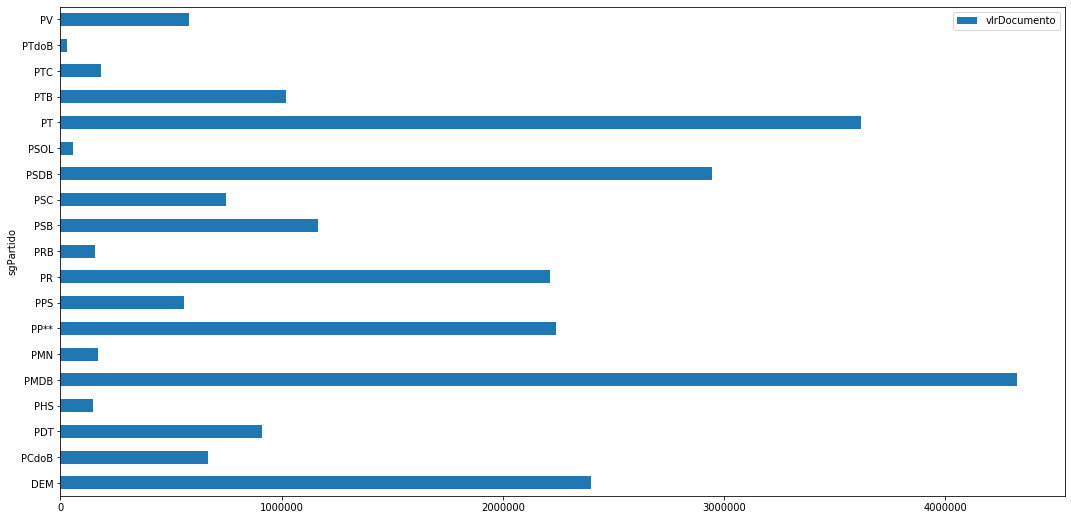

In [575]:
plotaQuestao10(anos[2], '2012')

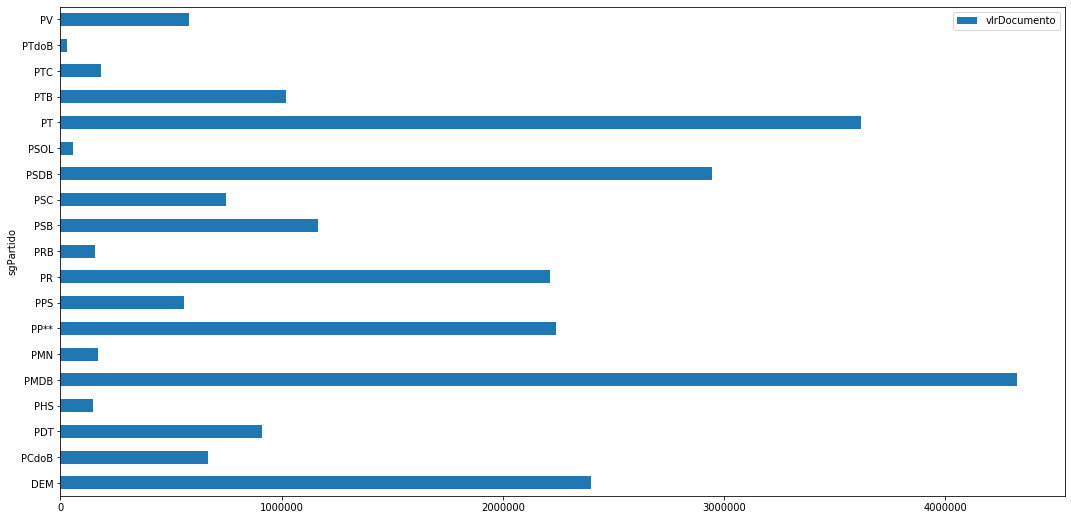

In [576]:
plotaQuestao10(anos[3], '2013')

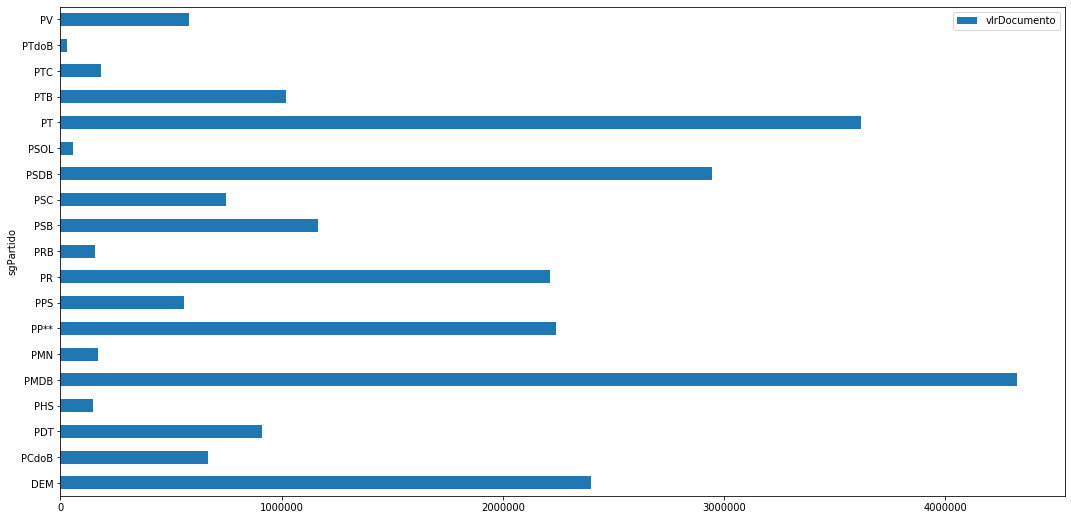

In [577]:
plotaQuestao10(anos[4], '2014')

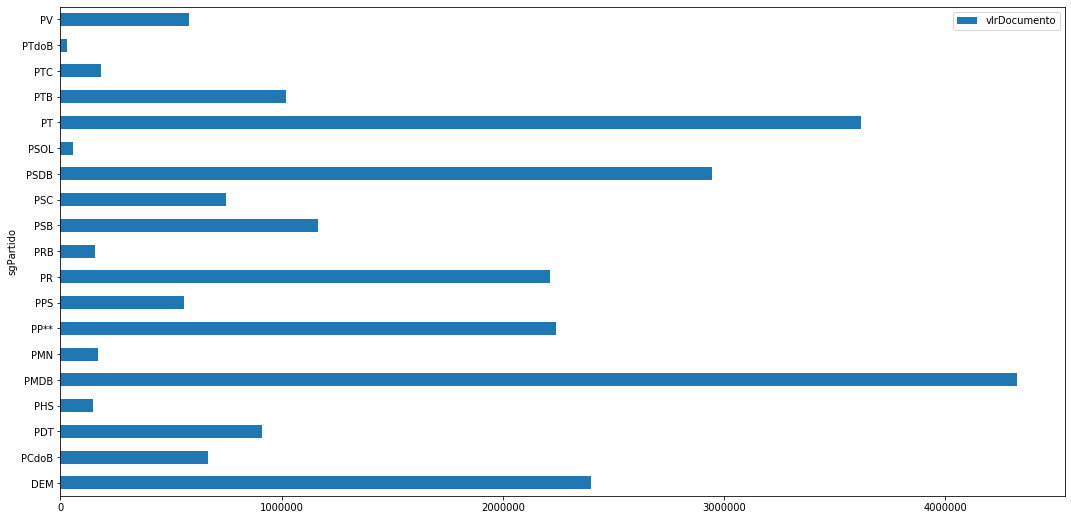

In [578]:
plotaQuestao10(anos[5], '2015')

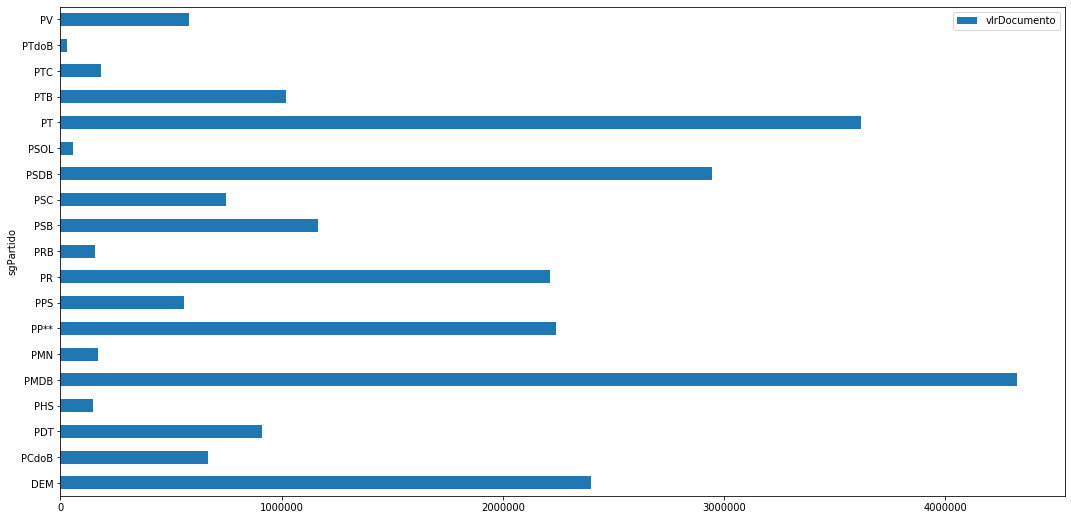

In [579]:
plotaQuestao10(anos[6], '2016')

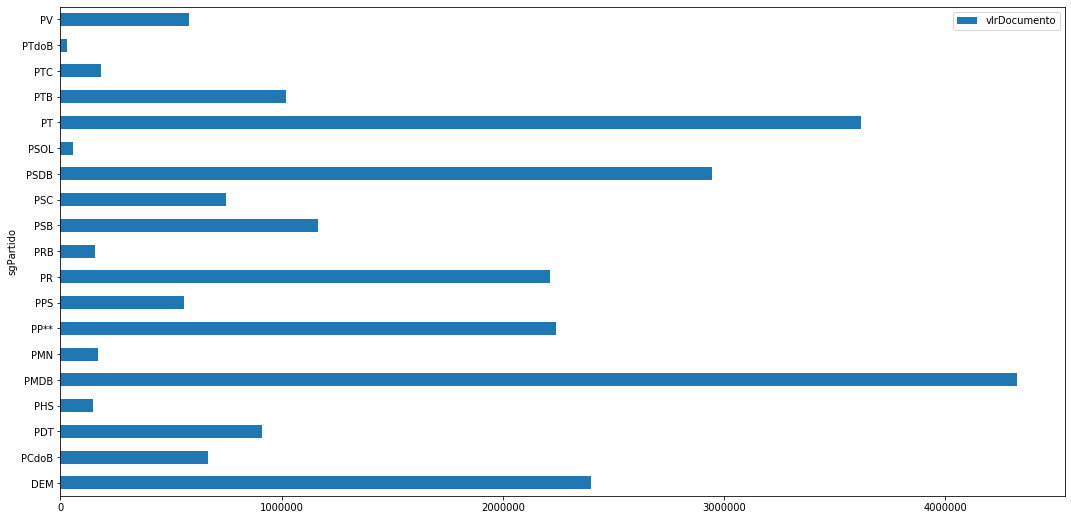

In [580]:
plotaQuestao10(anos[7], '2017')

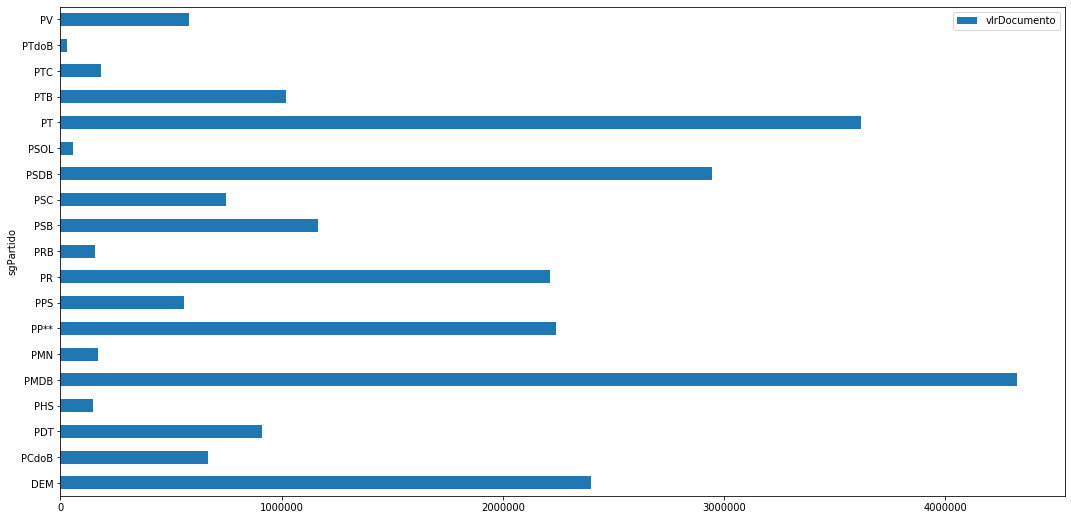

In [581]:
plotaQuestao10(anos[8], '2018')

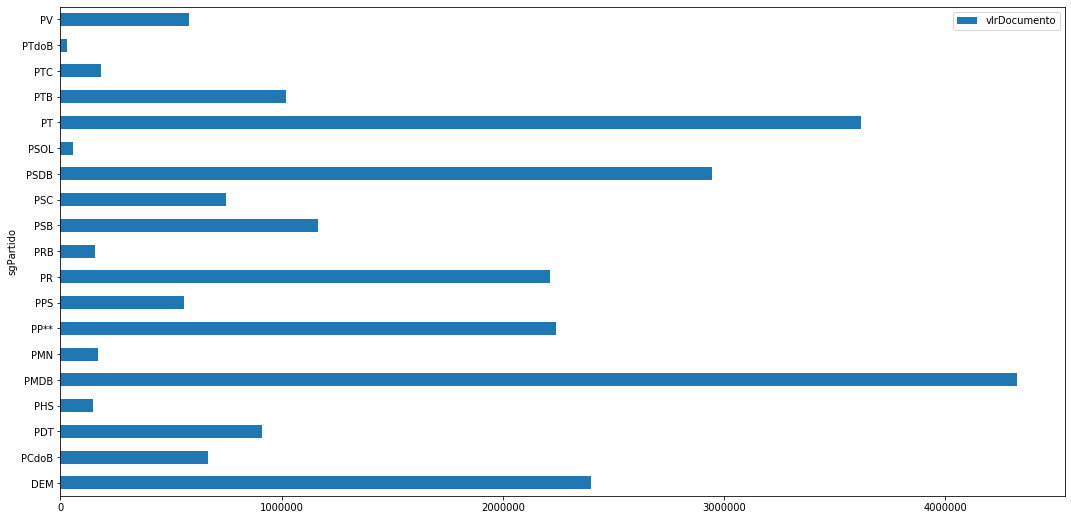

In [582]:
plotaQuestao10(anos[9], '2019')

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# <center> CONCLUSÃO

### Por fim chegamos a conclusão que podemos ter diversas oportunidades de manipulação e controle dados, além de poder ter um contato mais próximo com o gasto de dinheiro dos deputados do nosso país. O projeto em si foi de grande aprendizado para todos do grupo, que tivenharam bastante interesse na área além de ter sido uma experência inovadora.